<a href="https://colab.research.google.com/github/karolke99/nn_dl/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Assignment 2
Karol Waligora

In [ ]:
!pip install tensorflow

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from IPython.display import Image
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

11490434/11490434 [==============================] - 0s 0us/step


## Data divided by digits

In [3]:
def split_data_by_digits(data, labels, range):
    return data[np.isin(labels, range)], labels[np.isin(labels, range)]

def visualize_samples(data, title):
    plt.figure(figsize=(10,2))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(data[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


In [19]:
X_train_digits_0_2, y_train_digits_0_2 = split_data_by_digits(X_train, y_train, range(0,3))
X_train_digits_3_5, y_train_digits_3_5 = split_data_by_digits(X_train, y_train, range(3,6))
X_train_digits_6_9, y_train_digits_6_9 = split_data_by_digits(X_train, y_train, range(6,10))

y_train_digits_0_2_c = to_categorical(y_train_digits_0_2)
y_train_digits_3_5_c = to_categorical(y_train_digits_3_5)[:,3:]
y_train_digits_6_9_c = to_categorical(y_train_digits_6_9)[:,6:]

X_test_digits_0_2, y_test_digits_0_2 = split_data_by_digits(X_test, y_test, range(0,3))
X_test_digits_3_5, y_test_digits_3_5 = split_data_by_digits(X_test, y_test, range(3,6))
X_test_digits_6_9, y_test_digits_6_9 = split_data_by_digits(X_test, y_test, range(6,10))

y_test_digits_0_2_c = to_categorical(y_test_digits_0_2)
y_test_digits_3_5_c = to_categorical(y_test_digits_3_5)
y_test_digits_6_9_c = to_categorical(y_test_digits_6_9)

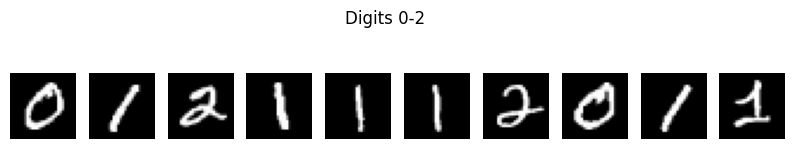

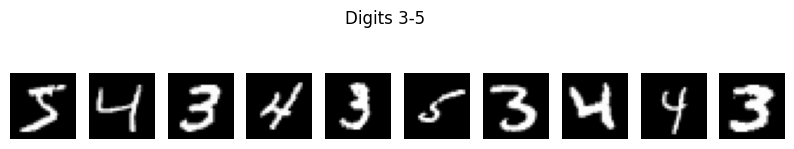

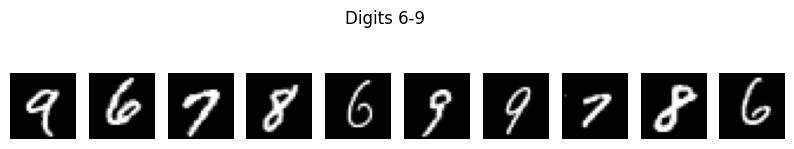

In [20]:
visualize_samples(X_train_digits_0_2, 'Digits 0-2')
visualize_samples(X_train_digits_3_5, 'Digits 3-5')
visualize_samples(X_train_digits_6_9, 'Digits 6-9')

In [21]:
def create_model(outputs_num):
    model = Sequential([
        # Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', input_shape=(28*28, )),
        Dense(outputs_num, activation='softmax')
    ])

    model.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

### Model for 0-2 digits

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 100867 (394.01 KB)
Trainable params: 100867 (394.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
466/466 [==============================] - 3s 5ms/step - loss: 0.2108 - accuracy: 0.9557 - val_loss: 0.0923 - val_accuracy: 0.9732
Epoch 2/10
466/466 [==============================] - 2s 4ms/step - loss: 0.0802 - accuracy: 0.9792 - val_loss: 0.0687 - val_accuracy: 0.9791
Epoch 3/10
466/466 [==============================] - 2s 4ms/step - loss: 0.0643 - accuracy: 0.9813 - val_loss: 0.0588 - val_a

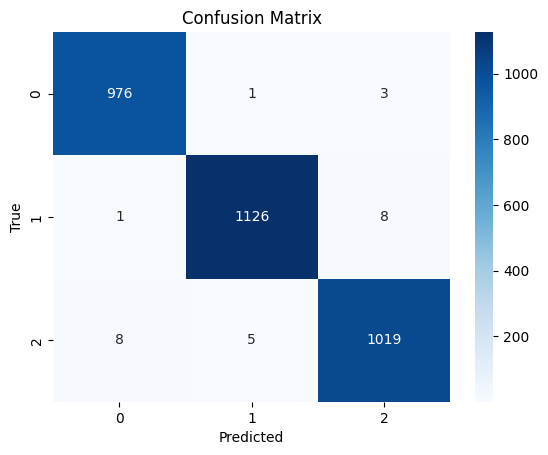

Precission score = 99.17408404816702 %
Recall score = 99.17381633301558 %


In [23]:
model_0_2 = create_model(3)
model_0_2.summary()
history = model_0_2.fit(X_train_digits_0_2,
              y_train_digits_0_2_c,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_0_2.evaluate(X_test_digits_0_2, y_test_digits_0_2_c)
y_pred = np.argmax(model_0_2.predict(X_test_digits_0_2), axis=1)
print(y_pred)
cm = confusion_matrix(y_test_digits_0_2, y_pred)
classes = np.unique(y_test_digits_0_2)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test_digits_0_2, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test_digits_0_2, y_pred, average="weighted"), 100)} %')

### Model for 3-5 digits

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 3)                 387       
                                                                 
Total params: 100867 (394.01 KB)
Trainable params: 100867 (394.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
435/435 [==============================] - 6s 8ms/step - loss: 0.3663 - accuracy: 0.9000 - val_loss: 0.1865 - val_accuracy: 0.9506
Epoch 2/10
435/435 [==============================] - 2s 4ms/step - loss: 0.1624 - accuracy: 0.9517 - val_loss: 0.1388 - val_accuracy: 0.9563
Epoch 3/10
435/435 [==============================] - 2s 4ms/step - loss: 0.1268 - accuracy: 0.9604 - val_loss: 0.1221 - val_a

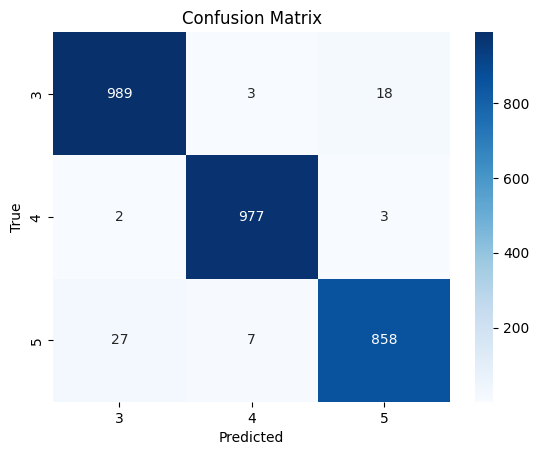

Precission score = 97.91844577654017 %
Recall score = 97.91955617198336 %


In [28]:
model_3_5 = create_model(3)
model_3_5.summary()
model_3_5.fit(X_train_digits_3_5,
              y_train_digits_3_5_c,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
# model_3_5.evaluate(X_test_digits_3_5, y_test_digits_3_5)
y_pred = np.argmax(model_3_5.predict(X_test_digits_3_5), axis=1) + 3
cm = confusion_matrix(y_test_digits_3_5, y_pred)
classes = np.unique(y_test_digits_3_5)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test_digits_3_5, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test_digits_3_5, y_pred, average="weighted"), 100)} %')

### Model for 6-9 digits

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 4)                 516       
                                                                 
Total params: 100996 (394.52 KB)
Trainable params: 100996 (394.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
600/600 [==============================] - 6s 7ms/step - loss: 0.4100 - accuracy: 0.8957 - val_loss: 0.1974 - val_accuracy: 0.9462
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1815 - accuracy: 0.9470 - val_loss: 0.1575 - val_accuracy: 0.9525
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1517 - accuracy: 0.9535 - val_loss: 0.1409 - val_a

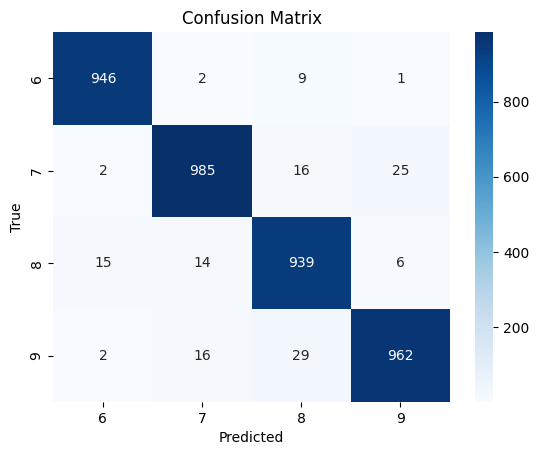

Precission score = 96.55686679392184 %
Recall score = 96.5482489292013 %


In [29]:
model_6_9 = create_model(4)
model_6_9.summary()
model_6_9.fit(X_train_digits_6_9,
              y_train_digits_6_9_c,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
# model_6_9.evaluate(X_test_digits_6_9, y_test_digits_6_9)
y_pred = np.argmax(model_6_9.predict(X_test_digits_6_9), axis=1) + 6
cm = confusion_matrix(y_test_digits_6_9, y_pred)
classes = np.unique(y_test_digits_6_9)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test_digits_6_9, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test_digits_6_9, y_pred, average="weighted"), 100)} %')

### Aggregate model

In [47]:
def aggregate_models(models):
    global_model = create_model(10)

    weights = []
    biases = []

    for local_model in models:
        w0 = local_model.layers[0].get_weights()[0]
        b0 = local_model.layers[0].get_weights()[1]
        weights.append(w0)
        biases.append(b0)

    w = np.average(weights, axis=0)
    b = np.average(biases, axis=0)

    global_model.layers[0].set_weights((w,b))

    weights = []
    biases = []
    for local_model in models:
        w1 = local_model.layers[1].get_weights()[0]
        b1 = local_model.layers[1].get_weights()[1]
        weights.append(w1)
        biases.append(b1)

    W = np.concatenate(weights, axis=1)
    B = np.concatenate(biases, axis=0)

    global_model.layers[1].set_weights((W,B))

    return global_model

In [48]:
global_model = aggregate_models([model_0_2, model_3_5, model_6_9])

313/313 [==============================] - 1s 2ms/step


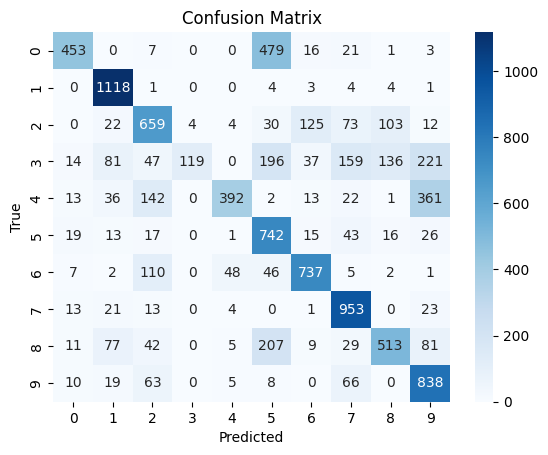

Precission score = 71.8985849266363 %
Recall score = 65.24 %


In [49]:
y_pred = np.argmax(global_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted", zero_division=0), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

Local models have pretty good evaluation scores, but the global model does not perform as well. Confusion matrix looks as for a pretty good model. There is pretty high value of precision and recall score, maybe not as good as for local models, but still satisfactory.

## Data divided by rows

In [56]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [57]:
def split_data_horizontally(data, labels, num_subsets):
    num_samples, num_rows = data.shape

    indices = np.arange(num_samples)
    np.random.shuffle(indices)

    samples_per_subset = num_samples // num_subsets

    local_datasets = []

    for i in range(num_subsets):
        sample_range = indices[i * samples_per_subset : (i + 1) * samples_per_subset]
        local_data = data[sample_range]
        local_labels = labels[sample_range]
        local_datasets.append((local_data, local_labels))

    return local_datasets

In [58]:
num_local_datasets = 3
local_datasets = split_data_horizontally(X_train, y_train, num_local_datasets)

In [59]:
X_train_1, y_train_1 = local_datasets[0]
X_train_2, y_train_2 = local_datasets[1]
X_train_3, y_train_3 = local_datasets[2]

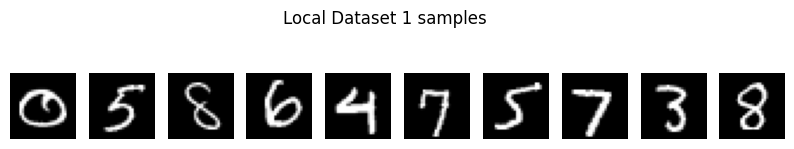

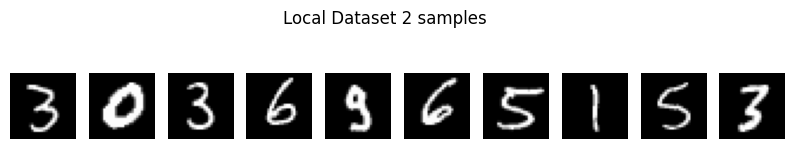

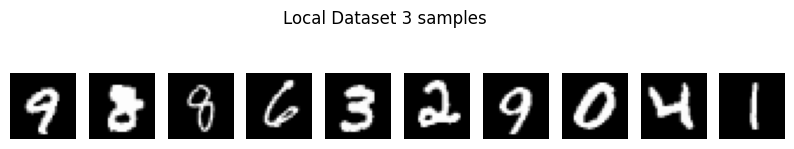

In [60]:
visualize_samples(X_train_1, "Local Dataset 1 samples")
visualize_samples(X_train_2, "Local Dataset 2 samples")
visualize_samples(X_train_3, "Local Dataset 3 samples")

In [63]:
def create_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(28*28, )),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

### Model 1

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               100480    
                                                                 
 dense_41 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 0.4503 - accuracy: 0.8708 - val_loss: 0.2323 - val_accuracy: 0.9358
Epoch 2/10
500/500 [==============================] - 3s 5ms/step - loss: 0.2138 - accuracy: 0.9383 - val_loss: 0.1836 - val_accuracy: 0.9498
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.1538 - accuracy: 0.9554 - val_loss: 0.1477 - val_

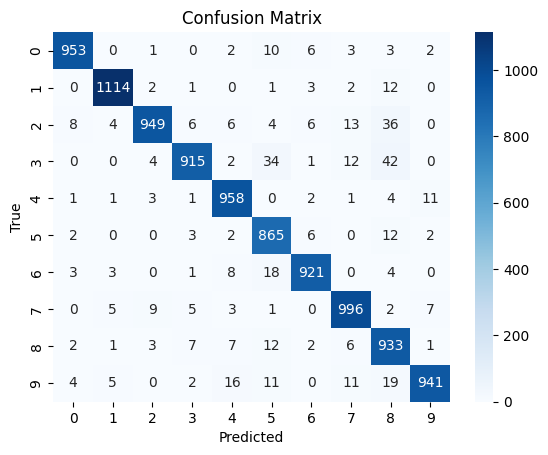

Precission score = 95.59673480933172 %
Recall score = 95.45 %


In [65]:
model_1 = create_model()
model_1.summary()
model_1.fit(X_train_1,
              y_train_1,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_1.evaluate(X_test, y_test)
y_pred = np.argmax(model_1.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

### Model 2

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               100480    
                                                                 
 dense_43 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 7s 9ms/step - loss: 0.4291 - accuracy: 0.8805 - val_loss: 0.2671 - val_accuracy: 0.9197
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2047 - accuracy: 0.9411 - val_loss: 0.2113 - val_accuracy: 0.9390
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.1457 - accuracy: 0.9599 - val_loss: 0.1811 - val_

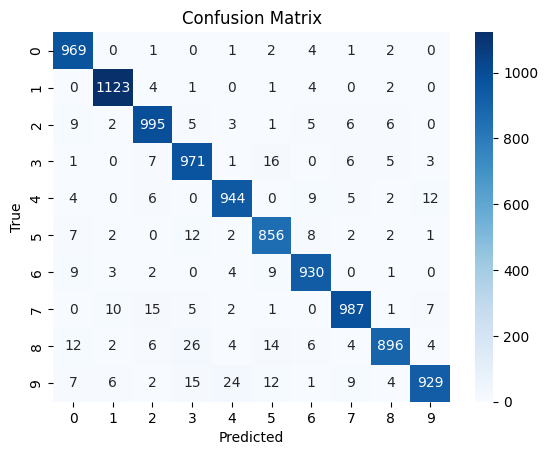

Precission score = 96.02409594492069 %
Recall score = 96.0 %


In [67]:
model_2 = create_model()
model_2.summary()
model_2.fit(X_train_2,
              y_train_2,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_2.evaluate(X_test, y_test)
y_pred = np.argmax(model_2.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

### Model 3

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               100480    
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 0.4499 - accuracy: 0.8711 - val_loss: 0.2713 - val_accuracy: 0.9185
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.2168 - accuracy: 0.9373 - val_loss: 0.2010 - val_accuracy: 0.9395
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.1533 - accuracy: 0.9558 - val_loss: 0.1771 - val_

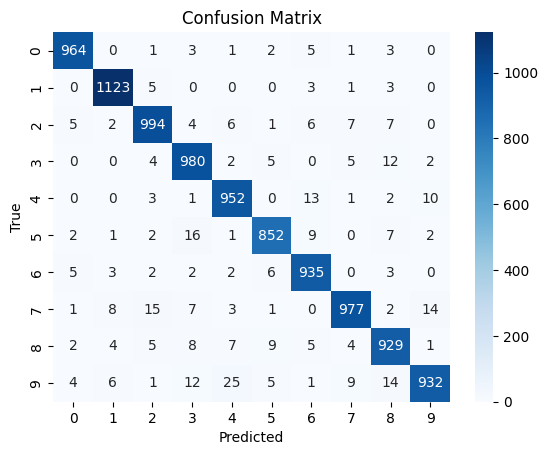

Precission score = 96.39086115703641 %
Recall score = 96.38 %


In [69]:
model_3 = create_model()
model_3.summary()
model_3.fit(X_train_3,
              y_train_3,
              epochs=10,
              batch_size=32,
              validation_split=0.2,
              shuffle=True,
              verbose=1,
              callbacks=[early_stopping]
              )
res = model_3.evaluate(X_test, y_test)
y_pred = np.argmax(model_3.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

### Aggregate model

In [93]:
# def aggregate_models(models):
#     global_model = create_model()
#     global_weights = global_model.get_weights()

#     for local_model in models:
#         local_weights = local_model.get_weights()
#         global_weights = [np.add(global_w, local_w) for global_w, local_w in zip(global_weights, local_weights)]

#     global_weights = [np.divide(w, len(models)) for w in global_weights]
#     global_model.set_weights(global_weights)

#     return global_model

#

def aggregate_models(models):
    global_model = create_model()

    for layer_index, global_layer in enumerate(global_model.layers):
        layer_weights = []
        layer_biases = []

        for local_model in models:
            local_weights, local_biases = local_model.layers[layer_index].get_weights()
            layer_weights.append(local_weights)
            layer_biases.append(local_biases)

        averaged_weights = np.average(layer_weights, axis=0)
        averaged_biases = np.average(layer_biases, axis=0)

        global_layer.set_weights([averaged_weights, averaged_biases])

    return global_model

In [94]:
global_model = aggregate_models([model_1, model_2, model_3])

313/313 [==============================] - 1s 3ms/step


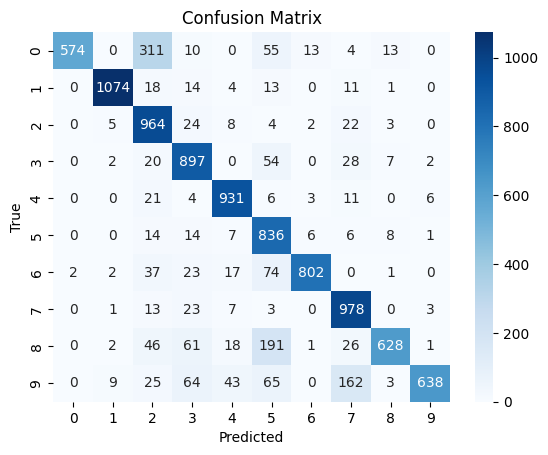

Precission score = 86.67162624506258 %
Recall score = 83.22 %


In [96]:
y_pred = np.argmax(global_model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted", zero_division=0), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

In this case the evaluation scores are way better than in splitting dataset by digits. The confusion matrix look much more like for well-fitted model, however there are some mistakes, especially in recognition of digit 0, 5 and 8. The values of precission and recall score are higher than in the case with splitting data byu digits. So, in general this approach seems to be better.

## Model trained on full dataset

In [97]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 128)               100480    
                                                                 
 dense_65 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2889 - accuracy: 0.9174 - val_loss: 0.1712 - val_accuracy: 0.9512
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1306 - accuracy: 0.9614 - val_loss: 0.1122 - val_accuracy: 0.9675
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0903 - accuracy: 0.9730 - val_loss: 0.1010 

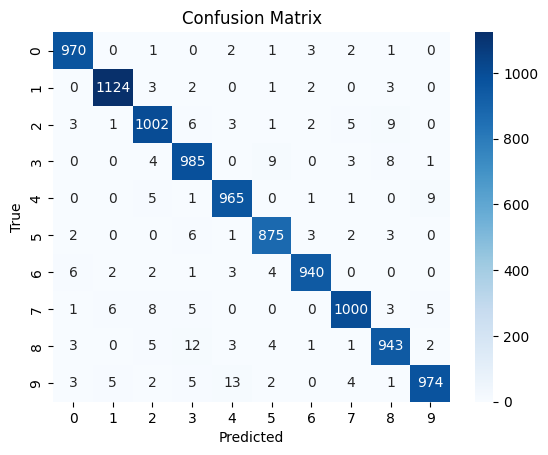

Precission score = 97.78342465180971 %
Recall score = 97.78 %


In [98]:
model = create_model()
model.summary()
model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2,
          shuffle=True,
          verbose=1,
          callbacks=[early_stopping]
          )
res = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f'Precission score = {np.multiply(precision_score(y_test, y_pred, average="weighted"), 100)} %')
print(f'Recall score = {np.multiply(recall_score(y_test, y_pred, average="weighted"), 100)} %')

Model trained on full dataset turned out to have the best fit. Metrics value are satisfactory - loss value is low, while the accuracy value is pretty high. Similarly, the precision and recall scores are good.

To sum up, splitting models might be an interesting apporach however in this case, when the same simple neural networks were used, the best results were achived in case when model was trained on full dataset. Perhaps, a better adjustment of parameters and layers of NN could improve the accuracy of the approach when the ensemble learning is used.